In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
with open("mcrun_superdict.pkl", "rb") as f:
    mcrun_superdict = pickle.load(f)

prediction_loss_history_archive    = np.zeros((16, 3))
prediction_loss_history_archive_cf = np.zeros((16, 3))
run_idx_list = [0, 1, 3, 5, 6, 8, 9, 11, 13, 14]
for run_idx in run_idx_list:
    mcrun_dict = mcrun_superdict["mc_run_dict"+f"{run_idx}"]
    prediction_loss_history_archive[run_idx, :]    = np.array(mcrun_dict["prediction_loss_history"])
    prediction_loss_history_archive_cf[run_idx, :] = np.array(mcrun_dict["prediction_loss_history_cf"])
    prediction_loss_history_mean                   = np.mean(prediction_loss_history_archive, axis=0)
    prediction_loss_history_std                    = np.std(prediction_loss_history_archive, axis=0)
    prediction_loss_history_mean_cf                = np.mean(prediction_loss_history_archive_cf, axis=0)
    prediction_loss_history_std_cf                 = np.std(prediction_loss_history_archive_cf, axis=0)



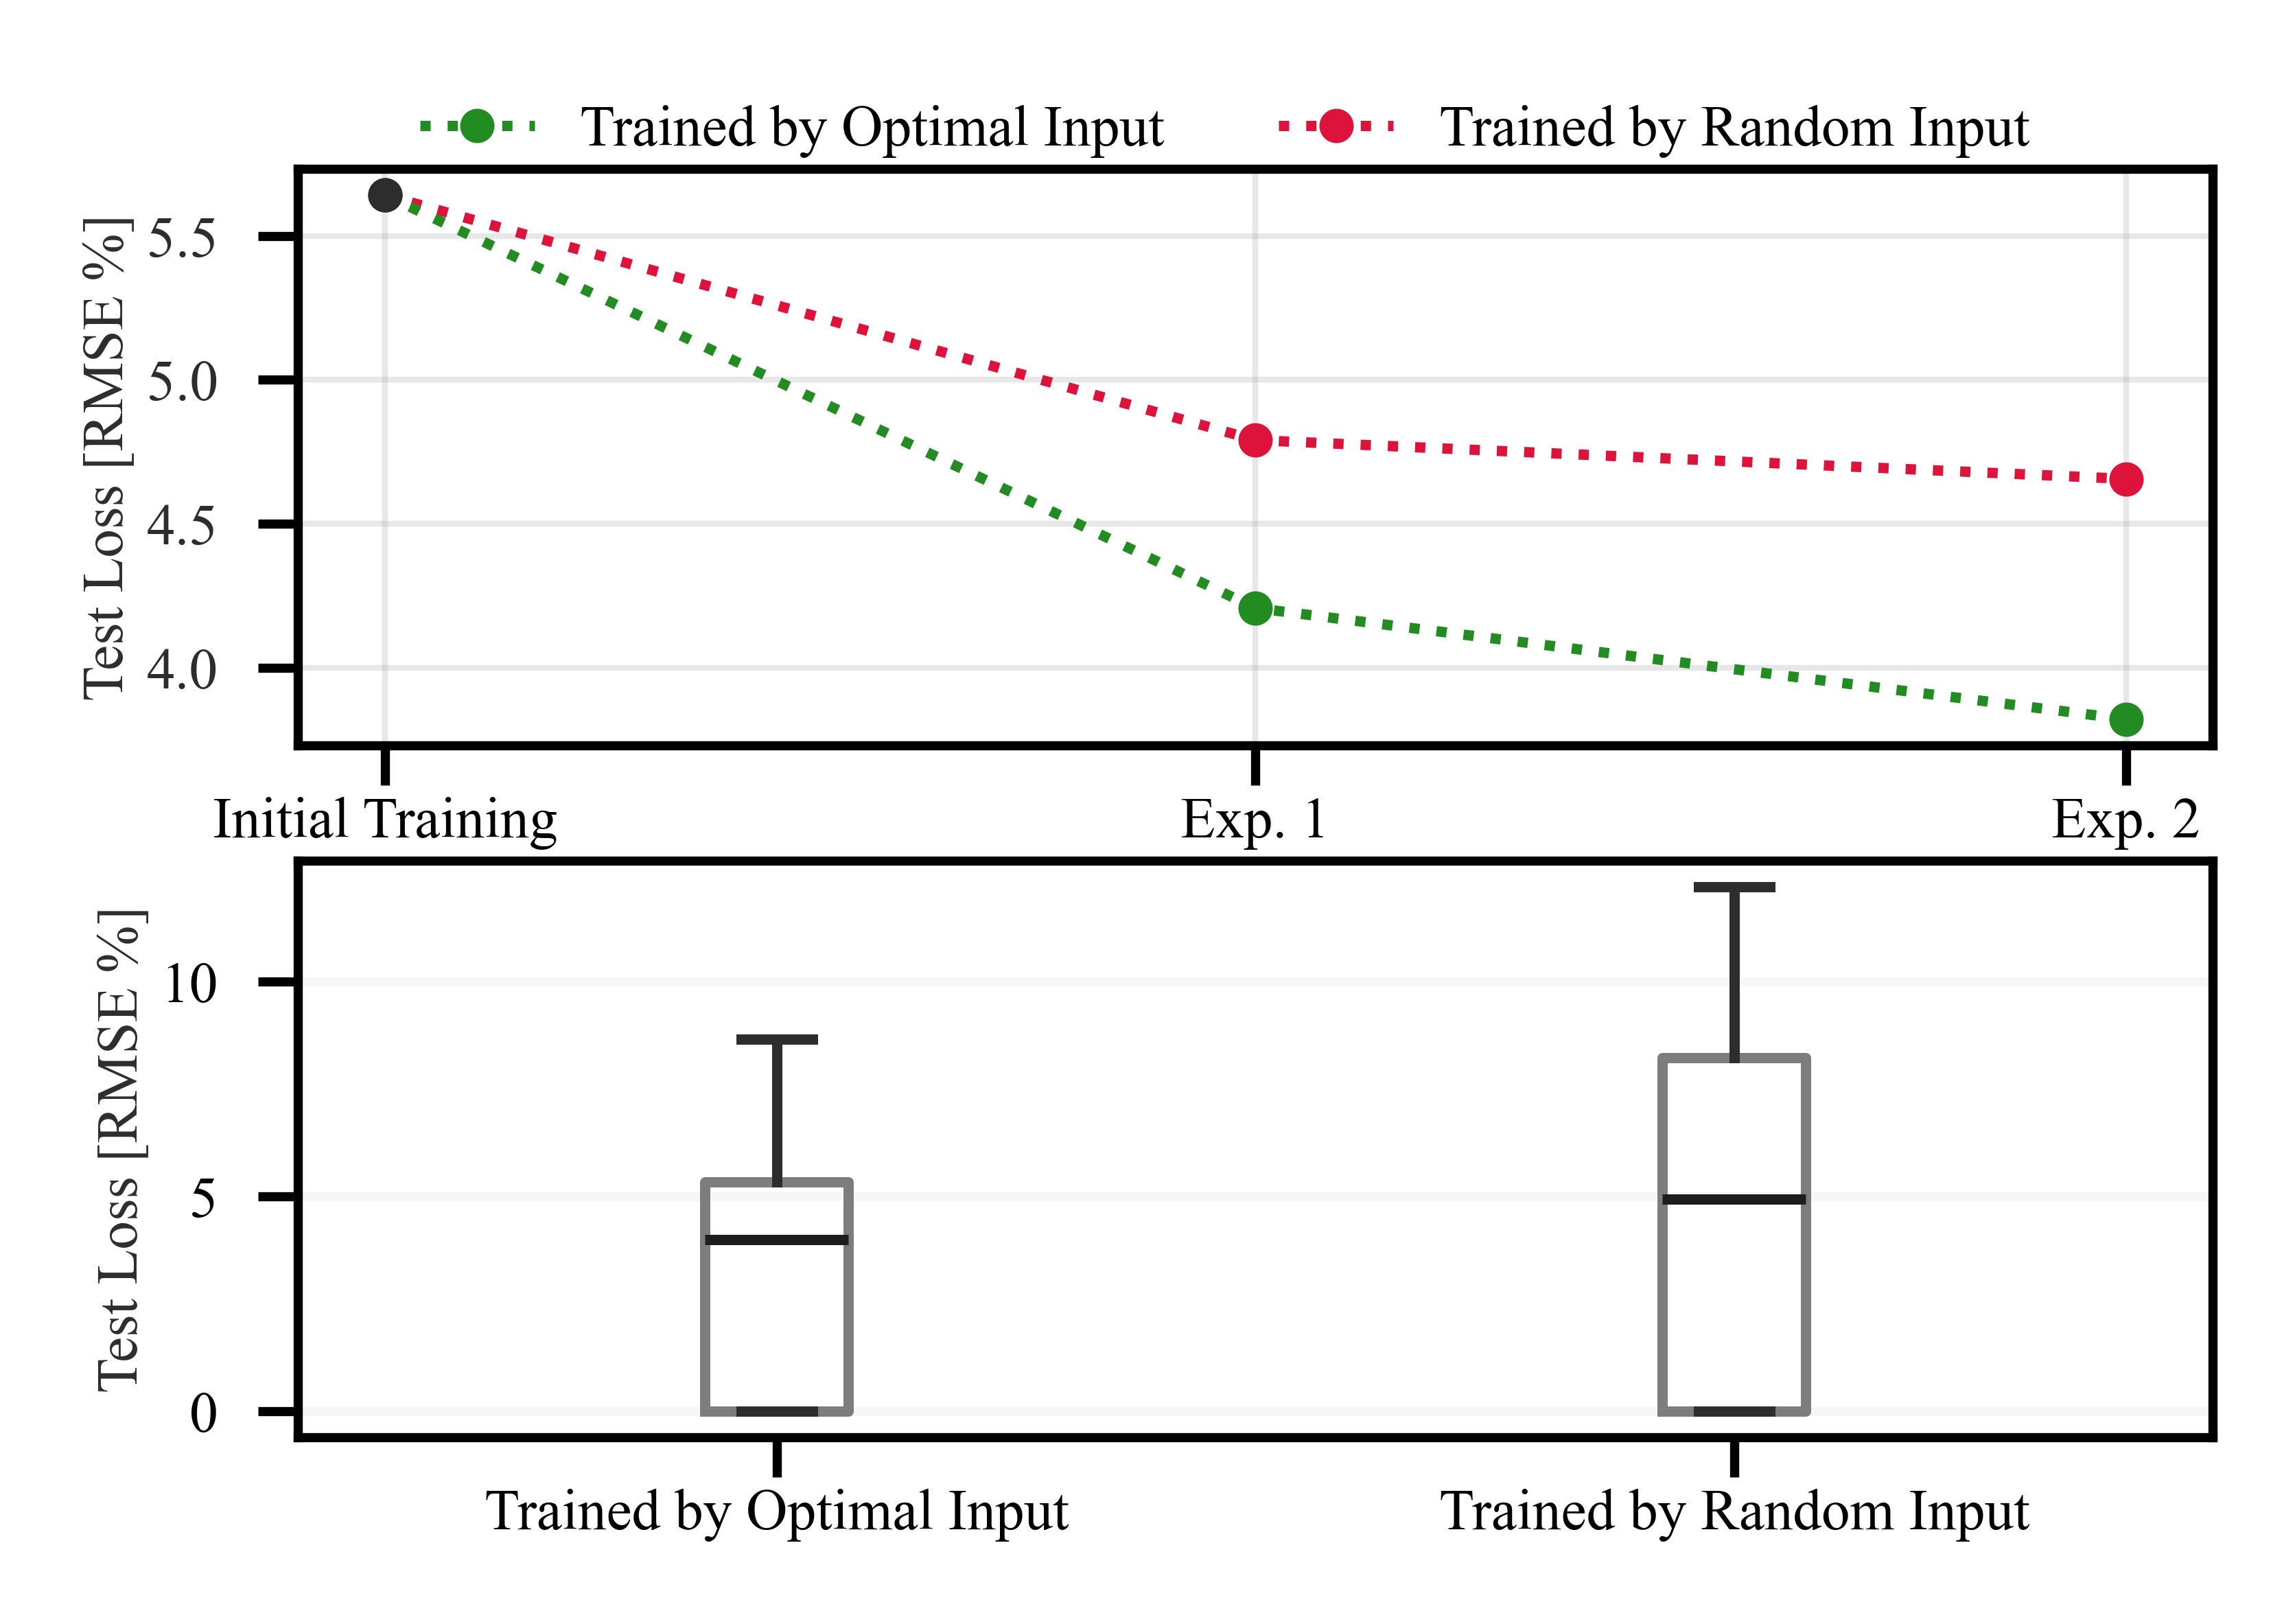

In [3]:
# Line width and figure settings
lw = 0.9  # Line width
dpi = 1200
fs = 5
ms = 2
std_multiplier = 0.05
colors = ["#2D2D2D", "#1F77B4", "#228B22", "salmon", "#6A0DAD", "#8AA7C1", "crimson"]

# Configure font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = fs
plt.rcParams.update({'font.size': fs})

# Generate x-values
x_values_loss = list(range(1, len(prediction_loss_history_mean) + 1))
x_labels_loss = ["Initial Training"] + [f"Exp. {i-1}" for i in x_values_loss[1:]]  # Custom x-axis labels
x_values_index = [x + 1 for x in x_values_loss[:-1]]  # Shift index x-values

# Create figure and main axis
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(3, 2), dpi=dpi)

# Plot Prediction Loss on primary y-axis
ax1.plot(x_values_loss[0], 100*prediction_loss_history_mean[0], color=colors[0], lw=lw, linestyle=':', marker="o", markersize=ms, zorder=5)
ax1.plot(x_values_loss, 100*prediction_loss_history_mean, color=colors[2], lw=lw, linestyle=':', marker="o", markersize=ms, label="Trained by Optimal Input", zorder=4)
ax1.plot(x_values_loss, 100*prediction_loss_history_mean_cf, color=colors[-1], lw=lw, linestyle=':', marker="o", markersize=ms, label="Trained by Random Input", zorder=3)

# ax1.fill_between(x_values_loss, prediction_loss_history_mean_cf + std_multiplier*prediction_loss_history_std_cf, prediction_loss_history_mean_cf - std_multiplier*prediction_loss_history_std_cf, color=colors[-1], lw=0, label=rf"{std_multiplier}$\times$std", zorder=2, alpha=0.2 )
ax1.set_ylabel("Test Loss [RMSE %]", color=colors[0], labelpad=1)
ax1.tick_params(axis="y", labelcolor=colors[0])
ax1.grid(True, alpha=0.3, linewidth=0.5)

# Set x-axis labels
ax1.set_xticks(x_values_loss, minor=False)
ax1.set_xticks(x_values_index, minor=True)
ax1.tick_params(axis='x', which='major', pad=1)
ax1.tick_params(axis='x', which='minor', length=1, width=0.5, color=colors[2], direction='inout', pad=1)
ax1.set_xticklabels(x_labels_loss, rotation=0, ha="center")

# Define the boxplot
boxprops = dict(linewidth=lw, color="#7D7D7D")  # Box properties
medianprops = dict(color="#1D1D1D", linewidth=lw)  # Median line color and thickness
whiskerprops = dict(linewidth=lw, color="#2D2D2D", linestyle='-')  # Whiskers color and thickness
capprops = dict(linewidth=lw, color="#2D2D2D")  # Cap line properties
flierprops = dict(marker='o', color='purple', markersize=0)  # Outliers styling

# Create the boxplot
ax2.boxplot(
    [100*prediction_loss_history_archive[:, -1], 100*prediction_loss_history_archive_cf[:, -1]],
    tick_labels=['Trained by Optimal Input', 'Trained by Random Input'],
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    showfliers =False
)

# Add title and labels
ax2.set_ylabel("Test Loss [RMSE %]", color=colors[0], labelpad=1)

# Add grid
ax2.grid(True, axis='y', linestyle='-', alpha=0.1)
plt.tick_params(axis='x', pad=1)
# Add legend above the plot with 4 columns
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=fs, frameon=False)
# plt.subplots_adjust(hspace=0.25)
plt.savefig('ExperimentDesign_Boxplot.pdf', dpi=dpi, bbox_inches='tight')
